In [2]:
import os, sys
import numpy as np
import pandas as pd
import healpy as hp
import GCRCatalogs
from GCR import GCRQuery
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from lsst.sims.utils import angularSeparation

%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
gals_dir = '/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/ddf_region_galaxy_catalog/'

In [5]:
fnames = glob.glob(os.path.join(gals_dir, 'gals*.hdf'))

In [6]:
results = []
for fname in fnames:
    res = pd.read_hdf(fname)['stellar_mass']
    results.append(res)

In [7]:
host_sn = pd.read_csv(os.path.join(gals_dir, 'DDF_sn_host_pairs.csv'))

In [13]:
pop_stellar_mass = pd.concat(results)

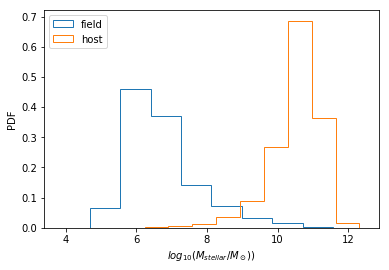

In [23]:
fig, ax = plt.subplots()
_ = ax.hist(np.log10(pop_stellar_mass.values), density=True, histtype='step', label='field')
_ = ax.hist(np.log10(host_sn.stellar_mass.values), density=True, histtype='step', label='host')
ax.set_xlabel(r'$log_{10}(M_{stellar}/ M_\odot))$')
ax.set_ylabel('PDF')
plt.legend(loc='best')
fig.savefig('stellar_mass.pdf')